In [1]:
# only for google colab
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/ATiML-project-SS20')
!cd "/content/drive/My Drive/Colab Notebooks/ATiML-project-SS20"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from corpus import load_meta_data
from features import load_features

In [2]:
#meta_data = load_meta_data()
#target = meta_data.guten_genre
#meta_data
meta_data = load_meta_data()
target = meta_data.guten_genre
target

book_id
pg10067                    Detective and Mystery
pg1032                                  Literary
pg10379                                 Literary
pg10473                          Western Stories
pg10812                                 Literary
                                   ...          
pg766DickensDavidCopfld                 Literary
pg786DickensHardTimes                   Literary
pg834DoyleMemoirsSherlk    Detective and Mystery
pg863Agatha1               Detective and Mystery
pg98DickensTaleCities                   Literary
Name: guten_genre, Length: 996, dtype: object

In [3]:
#features = load_features().dropna()
#features
import pandas as pd
import numpy as np
test_features = pd.read_csv('feature_collection_test.csv', index_col='book_id')
test_features
train_features = pd.read_csv('feature_collection_train.csv', index_col='book_id')
del test_features['genre']
del train_features['genre']

## Overview

* feature scaling
* test-train-split
* random oversampling on train set
* training of a decision tree
* evaluation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

Using TensorFlow backend.


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)

train_features = pd.DataFrame(
    scaler.transform(train_features),
    index=train_features.index,
    columns=train_features.columns
  )
test_features = pd.DataFrame(
    scaler.transform(test_features),
    index=test_features.index,
    columns=test_features.columns
  )

,title_word_count,title_avg_word_length,._count,!_count,?_count,",_count",``_count,length,proper_names,pos_sentiment,...,point_of_view,sim_alle,sim_cs,sim_dam,sim_gah,sim_hawas,sim_lit,sim_lar,sim_saa,sim_ws
book_id,,,,,,,,,,,,,,,,,,,,,
pg43925,1.275764,-0.440663,-0.563899,-0.050118,0.395586,1.471836,1.018312,0.453131,-0.581926,-0.231648,...,0.091478,0.011487,-1.777377,-1.065124,-1.157781,-0.850411,-1.148283,-0.524089,0.543452,-0.545842
pg515,0.336899,-0.321433,-0.201560,-0.193847,0.003050,1.534875,-0.854287,-0.436399,0.055502,0.141090,...,-1.497824,2.726668,1.365205,-1.548579,-0.093416,1.019905,0.439881,2.049274,0.438591,-0.451549
pg8182,0.023944,-0.822199,-0.601559,-0.630393,-0.036973,0.128066,-0.069948,-0.990867,-0.699061,-1.443049,...,-0.313900,0.145826,0.806313,0.546836,2.101585,0.071354,-0.141497,1.209145,1.182016,0.509006
pg46457,0.336899,-0.202203,1.318017,-0.100082,0.085863,-1.281674,0.370523,-0.324503,-0.244858,-2.095341,...,-0.960478,-1.164121,-1.759180,-2.019208,-2.692604,1.183043,-1.808342,-1.035576,-0.285169,2.603453
pg38199,1.275764,0.115745,0.239397,0.154292,-0.544711,0.701601,0.071820,-0.523305,-0.027791,-0.464610,...,0.447172,0.121858,-0.488139,-1.140717,-1.491035,1.022973,-0.953167,0.892162,2.489892,-1.310235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pg20661,0.336899,-1.036814,-0.761450,-0.904248,-0.042127,-0.269310,-0.670817,-1.268991,0.102840,2.750260,...,2.264078,1.416425,0.397219,1.455932,1.005640,0.488615,-0.196465,1.675958,1.629222,0.978989
pg1809,0.962809,-0.142587,1.389528,-0.945351,0.591317,-1.219634,0.655593,-0.034591,-0.187791,-0.138464,...,0.480533,0.740655,-0.710671,-1.077761,0.008285,1.756813,-0.305912,-0.222302,-0.435902,2.379134
pg41330,0.962809,-0.857968,-0.315022,-0.395400,0.102738,0.230836,0.159846,-0.659549,-0.837461,0.746791,...,-0.996163,0.648004,0.632694,1.643417,1.556790,-0.663414,0.474646,-0.564494,-1.311722,-0.337624


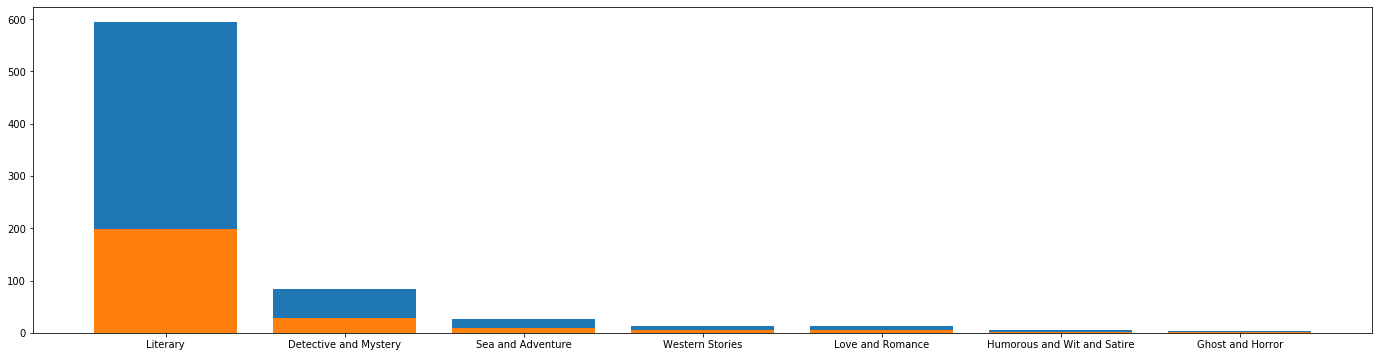

In [6]:
import maEva
(X_train, X_test) = maEva.GetTrainTestFromSplit(train_features, test_features, target, draw_plot = True, use_pca = False,
                                                            over_sample = True)
y_train = target[X_train.index]
y_test = target[X_test.index]
X_train

In [7]:
#train, test = train_test_split(features_scaled, stratify=target[features_scaled.index])

In [8]:
#x_train_res, y_train_res = RandomOverSampler().fit_resample(train, target[train.index])

## DecisionTreeClassifier

19% avg precision

71% avg weigthed precision

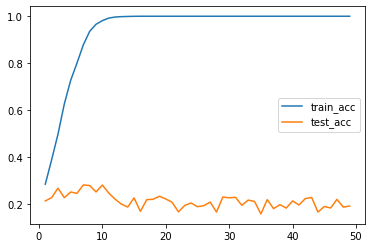

In [30]:
max_depths = np.arange(1, 50, 1)
results = pd.DataFrame([], columns=['train_acc', 'test_acc'])

for max_depth in max_depths:
  clf = DecisionTreeClassifier(max_depth=max_depth)
  clf.fit(X_train, y_train)

  results.loc[max_depth] = [
    balanced_accuracy_score(y_train, clf.predict(X_train)),
    balanced_accuracy_score(y_test, clf.predict(X_test))
  ]

results.plot()

In [31]:
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
train_pred = clf.predict(X_train)

                             precision    recall  f1-score   support

      Detective and Mystery       0.83      0.84      0.84       594
           Ghost and Horror       1.00      1.00      1.00       594
Humorous and Wit and Satire       0.98      1.00      0.99       594
                   Literary       0.80      0.80      0.80       594
           Love and Romance       0.98      1.00      0.99       594
          Sea and Adventure       0.97      0.91      0.94       594
            Western Stories       0.99      1.00      0.99       594

                   accuracy                           0.94      4158
                  macro avg       0.94      0.94      0.94      4158
               weighted avg       0.94      0.94      0.94      4158



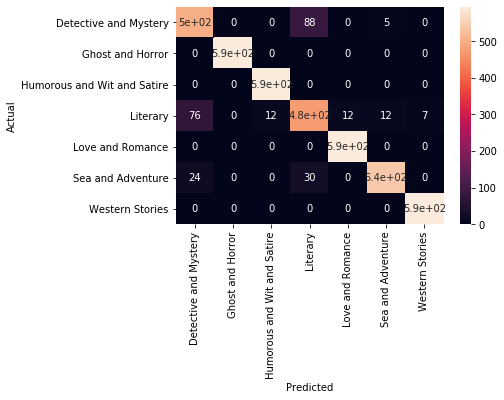

In [33]:
print(classification_report(y_train, train_pred))
cm = pd.crosstab(y_train, train_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [34]:
test_pred = clf.predict(X_test)

                             precision    recall  f1-score   support

      Detective and Mystery       0.34      0.54      0.42        28
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         1
                   Literary       0.85      0.74      0.79       198
           Love and Romance       0.11      0.20      0.14         5
          Sea and Adventure       0.08      0.11      0.10         9
            Western Stories       0.33      0.60      0.43         5

                   accuracy                           0.67       248
                  macro avg       0.25      0.31      0.27       248
               weighted avg       0.73      0.67      0.69       248



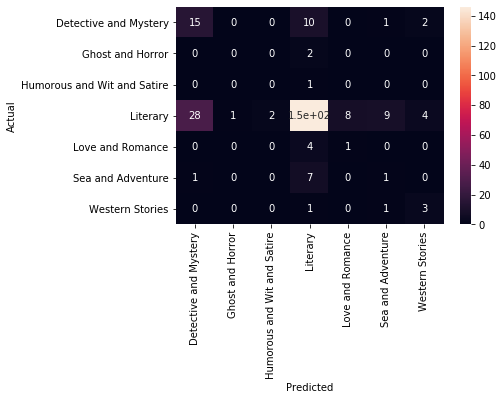

In [35]:
print(classification_report(y_test, test_pred))
cm = pd.crosstab(y_test, test_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [36]:
print("Decision Tree: Balanced Acc: {}, Adjusted Acc: {} ".format(maEva.GetAccuracy(y_test, test_pred),
                                                                 maEva.GetAccuracy(y_test, test_pred, adjusted = True)))

Decision Tree: Balanced Acc: 0.3120284477427334, Adjusted Acc: 0.1973665223665223 


## RandomForestClassifier

18% avg precision

73% avg weigthed precision

In [86]:
clf = RandomForestClassifier(max_depth=5, min_samples_leaf=3,n_estimators = 200)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
train_pred = clf.predict(X_train)

                             precision    recall  f1-score   support

      Detective and Mystery       0.75      0.94      0.83       594
           Ghost and Horror       1.00      1.00      1.00       594
Humorous and Wit and Satire       0.98      1.00      0.99       594
                   Literary       0.95      0.60      0.73       594
           Love and Romance       0.94      1.00      0.97       594
          Sea and Adventure       0.93      0.92      0.92       594
            Western Stories       0.95      1.00      0.98       594

                   accuracy                           0.92      4158
                  macro avg       0.93      0.92      0.92      4158
               weighted avg       0.93      0.92      0.92      4158



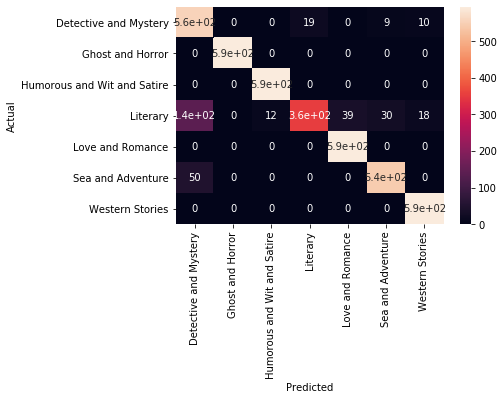

In [88]:
print(classification_report(y_train, train_pred))
cm = pd.crosstab(y_train, train_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [89]:
test_pred = clf.predict(X_test)

                             precision    recall  f1-score   support

      Detective and Mystery       0.32      0.89      0.48        28
           Ghost and Horror       0.00      0.00      0.00         2
Humorous and Wit and Satire       0.00      0.00      0.00         1
                   Literary       0.93      0.59      0.72       198
           Love and Romance       0.19      0.60      0.29         5
          Sea and Adventure       0.27      0.44      0.33         9
            Western Stories       0.25      0.60      0.35         5

                   accuracy                           0.61       248
                  macro avg       0.28      0.45      0.31       248
               weighted avg       0.80      0.61      0.65       248



E:\Programme\anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


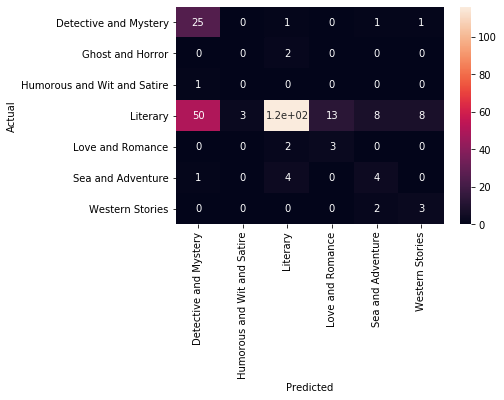

In [90]:
print(classification_report(y_test, test_pred))
cm = pd.crosstab(y_test, test_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [91]:
print("Random Forest: Balanced Acc: {}, Adjusted Acc: {} ".format(maEva.GetAccuracy(y_test, test_pred),
                                                                 maEva.GetAccuracy(y_test, test_pred, adjusted = True)))

Random Forest: Balanced Acc: 0.44616573902288187, Adjusted Acc: 0.3538600288600288 


In [49]:
pd.DataFrame(clf.feature_importances_, index=X_test.columns, columns=['feature_importance'])

,feature_importance
title_word_count,0.023146
title_avg_word_length,0.022099
._count,0.061943
!_count,0.037604
?_count,0.046063
",_count",0.042778
``_count,0.040759
length,0.034099
proper_names,0.051299
pos_sentiment,0.072914
